#### Exercícios

Escolha uma imagem e tente melhorá-la utilizando as operações vistas em sala de aula. Deverão ser realizados os pontos abaixo:
* Recorte da imagem de acordo com uma parte específica da imagem escolhida pelo aluno
* Aplique brilho na imagem utilizando o espaço de cor HSV ou CIE-LAB (lab para o opencv)
* Aplique brilho e contraste usando a função addWeighted do opencv
* Aplique operações de translação e rotação na imagem 
* Aplique operação de shear a partir da imagem original(sem rotação ou translação)

Observação: pode aplicar todas as operações em uma única imagem ou em imagens distintas

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pa = cv2.imread("datasets/phanton.png")
img = cv2.cvtColor(pa, cv2.COLOR_BGR2RGB)
print(img.shape)

(400, 600, 3)


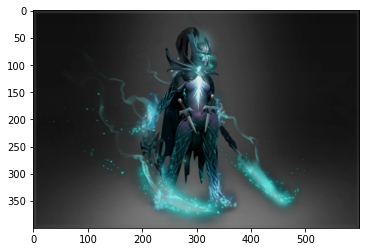

In [3]:
plt.imshow(img)

### Recorte da imagem

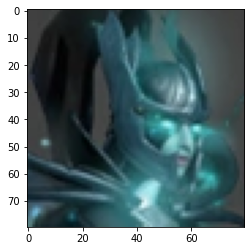

In [4]:
x=260
y=40
w = 80
h = 80
plt.imshow(img[y:y+h, x:x+w])

### Aplique brilho na imagem utilizando o espaço de cor HSV ou CIE-LAB (lab para o opencv)

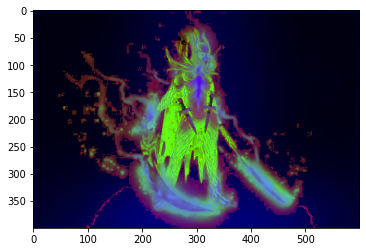

In [12]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)

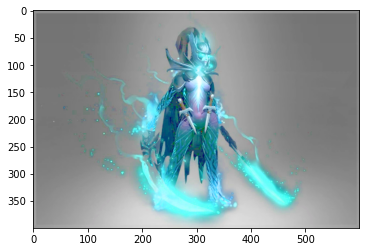

In [13]:
brilho = 100
img_hsv[:,:,2] = cv2.add(img_hsv[:,:,2], brilho)
img_bright = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_bright);

### escala de duas imagem   addWeighted

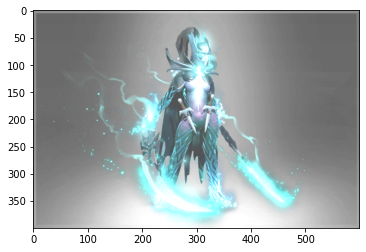

In [12]:
imgBlending = img.copy()
imgBlending = cv2.addWeighted(imgBlending, 1.5, imgBlending, 0, 80)
plt.imshow(imgBlending)

### rotate

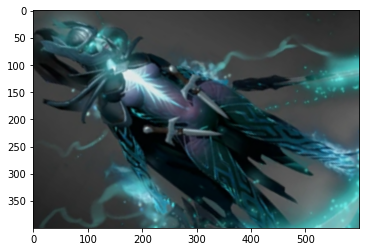

In [40]:
height, width = img.shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=60, scale=2)
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image);

### Translação

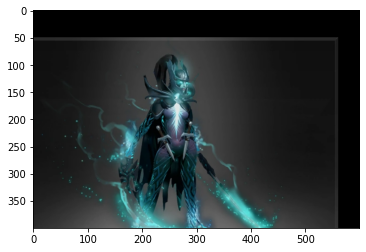

In [5]:
M = np.float32([[1, 0, -40], [0, 1, 50]])
shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(shifted);

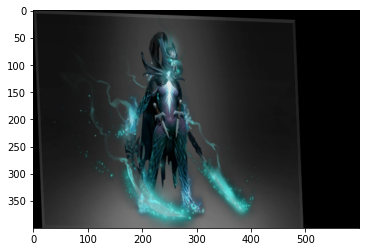

In [44]:
matrizShear = np.float32([[0.8, 0.04, 1], [0.03, 1, 0],[0, 0, 1]])
rows, cols, dim = img.shape
sheared_img = cv2.warpPerspective(img,matrizShear,dsize=(width, height))
plt.imshow(sheared_img);